<p><strong>nom,prenom : otmane El Bekkaoui </strong><p>
<p><strong>class : 3eme annee ISI</strong></p>
<p><strong>objet : Examen en Machine learning et Deep learning: Réalisation d'un projet avec LSTM et Keras</strong></p>



<h1>Music Genre multi-Classification using LSTM Neural Networks</h1>
<p>in this project we will try to develop a music genre multi-classification model that can classify music tracks into these class : blues, classical, country, disco, hiphop, metal, pop, reggae, rock jazz</p>

<h2>About the dataset:</h2>
<h3>title: GTZAN Dataset - Music Genre Classification</h3>
<h3>size : 1gb</h3>
<h3>contents: </h3>
  <p>  <strong>  genres original</strong> - A collection of 10 genres with 100 audio files each, all having a length of 30 seconds </p>
  <p><strong>  images original</strong> - A visual representation for each audio file...(we wont need this)</p>
    
  <p><strong>  2 CSV files</strong> - Containing features of the audio files. One file has for each song (30 seconds long) a mean and variance computed over multiple features that can be extracted from an audio file...</p>
  
 <a href="https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification">source</a> 
  
  
  <h2>steps of the project :</h2>
  <h3>treating the dataset</h3>
    <p>  using the mfccs which stand for stands for Mel Frequency Cepstral Coefficients, which is a feature extraction technique and is used in audio signal processing and speech recognition. </p>
  <h3>defining X and y</h3>
    <p>X being the features , and y being the classes</p>
  <h3>buiding the model</h3>
    <p>building the model using squential and adding the lstm and other layers </p>
  <h3>traning the model</h3>
    <p>using the x and y to train the value </p>
  <h3>evaluating the model</h3>
    <p>calculating the evaluating metrics</p>
    
   

In [1]:
#importing the generaly needed libraries 
import pandas as pd 
import numpy as np 
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt 


In [2]:
#loading the features file that countains information about each feature 
#assigning the path to {audio_dataset_path} for later porposes
audio_dataset_path='Data/genres_original'
metadata=pd.read_csv('Data/features_30_sec.csv')
#visualizing the data 
metadata.head()


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
#visualizing the data
metadata.tail()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock
999,rock.00099.wav,661794,0.358401,0.085884,0.054454,0.000336,1609.795082,422203.216152,1797.213044,120115.632927,...,59.167755,-7.069775,73.760391,0.028346,76.504326,-2.025783,72.189316,1.155239,49.662510,rock


In [4]:
#we define a function that extracts the audio data from the files 
def features_extractor(file):
    #we load the data into the {audio} variable and the rate of the sample_data into{sample_rate}
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    #we extract the Mel-frequency cepstral coefficients (y is data, sr is the rate of the data,n_mfcc is  number of MFCCs to extract)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #calculate the mean value of each MFCC feature 
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    #we get a vector of 40 mfccs_scaled_features
    return mfccs_scaled_features

In [5]:
#we delete one row to test the later block 
#!!!we run this only once 
#metadata.drop(labels=552, axis=0, inplace=True)

In [6]:
 
# the purpose of this block is to iterate to each row in our metadata and finaly getting a array that countains 
# each lable and its corisbonding mfccs score 

#we import the tqdm librarie to add a progress bar and test our block of code
from tqdm import tqdm
#we intialize an empty array
extracted_features =[]
#we itirate into each row in our metadata using .iterrows()
for index_num,row in tqdm(metadata.iterrows()):
    try:
        #we assign the label variable 
        final_class_lables=row["label"] # bleus, blues...,clasical,clasical.....rock.
        #we join the path so that we get the path for the genre file 
        file_name = os.path.join(os.path.abspath(audio_dataset_path),final_class_lables+'/',str(row["filename"]))
        #Data/genres_original/(blues or clasical ...)/file(exmp : blues.00000.wav)
        
        #data = array countaing the mean mfccs for the lables
        data = features_extractor(file_name)
        #[-1.999,....]
        
        #we add them togther 
        extracted_features.append([data,final_class_lables])
        
        #what we have here is simply to keep the code running and thow an error message if the path was not found or any other reason
    except Exception as e:
        print(f"Error:{e}")
        continue 


554it [01:10,  8.89it/s]C:\Users\LhajInfo\AppData\Local\Temp/ipykernel_17884/1996291316.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
C:\Users\LhajInfo\AppData\Roaming\Python\Python39\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
556it [01:10, 10.90it/s]

Error:


1000it [01:58,  8.41it/s]


In [7]:
print(data)
#this is what the array of means looks like before

[-2.3520059e+02  1.2387175e+02 -2.2546131e+01  5.2951675e+01
 -1.4538206e+00  2.4660511e+01 -7.0884738e+00  1.4890100e+01
 -1.2783066e+01  1.6718231e+01 -2.9434726e+00  1.0081299e+01
 -1.5028531e+01  3.1190753e+00 -7.1235514e+00  1.7955873e+00
 -7.0771871e+00  2.3404432e-02 -2.0338798e+00  1.1501081e+00
 -5.1028481e+00 -1.9207362e+00 -2.4087029e+00 -5.8205523e+00
 -1.2543029e+01 -9.1261854e+00  5.6508808e+00  3.6848648e+00
  3.1544328e+00 -8.8116179e+00 -7.8562846e+00 -4.7498784e+00
 -3.3666086e-01 -8.2353611e+00 -4.7341537e+00 -6.6724620e+00
 -5.7475910e+00 -5.9541826e+00 -5.2539768e+00  1.7758615e+00]


In [8]:
print(extracted_features)
# and this is what the output looks like adding the labels

[[array([-1.1359882e+02,  1.2157067e+02, -1.9162262e+01,  4.2363941e+01,
       -6.3622661e+00,  1.8621931e+01, -1.3699734e+01,  1.5339802e+01,
       -1.2274304e+01,  1.0970945e+01, -8.3260612e+00,  8.8020878e+00,
       -3.6699412e+00,  5.7446752e+00, -5.1627831e+00,  7.5170642e-01,
       -1.6878541e+00, -4.0872997e-01, -2.3026767e+00,  1.2224671e+00,
       -3.5328746e+00, -1.1397806e+00, -4.2828283e+00, -4.2260838e+00,
        9.1518748e-01,  9.1406381e-01, -5.7618070e+00, -3.9328036e+00,
        1.5094346e+00,  2.6984656e+00,  5.6560731e+00, -3.2690079e+00,
       -2.0606382e-01, -2.9996979e+00,  4.4763169e+00, -4.7685504e-01,
        6.0062852e+00, -5.9690420e-02, -3.4585848e+00, -1.8418322e+00],
      dtype=float32), 'blues'], [array([-2.0752383e+02,  1.2398514e+02,  8.9470186e+00,  3.5867149e+01,
        2.9095943e+00,  2.1519472e+01, -8.5565128e+00,  2.3370676e+01,
       -1.0103608e+01,  1.1899242e+01, -5.5588241e+00,  5.3778763e+00,
       -2.2344921e+00,  4.2207041e+00, -6

In [9]:
#ofcourse the output is not readable so we creat a pandas DataFrame with 2 clumns features (array) and class
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head

<bound method NDFrame.head of                                                feature  class
0    [-113.59882, 121.57067, -19.162262, 42.36394, ...  blues
1    [-207.52383, 123.98514, 8.947019, 35.86715, 2....  blues
2    [-90.757164, 140.44087, -29.084547, 31.686693,...  blues
3    [-199.57513, 150.0861, 5.663404, 26.855282, 1....  blues
4    [-160.35417, 126.20948, -35.581394, 22.139256,...  blues
..                                                 ...    ...
994  [-153.63005, 109.904785, -23.091646, 59.014496...   rock
995  [-142.41621, 116.20546, -32.160263, 49.11151, ...   rock
996  [-124.989655, 115.18234, -47.985886, 52.820343...   rock
997  [-225.03336, 123.657265, -9.745124, 56.613846,...   rock
998  [-235.20059, 123.87175, -22.546131, 52.951675,...   rock

[999 rows x 2 columns]>

In [10]:
extracted_features_df['class'].value_counts()
#value count gives us the unique values in this case the class and how many features of it we have 

blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          99
Name: class, dtype: int64

In [11]:
#after we treted the data we can folow the common process to train it 
#we divde the our dataset into X and Y X being the features and y the classes

X=np.array(extracted_features_df['feature'].tolist())#tolist to convert panda dataframe into simple array
y=np.array(extracted_features_df['class'].tolist())

In [12]:
#verfing the size of x and y 
print(X.shape,y.shape)

(999, 40) (999,)


<h1>explaining the proccese of converting y </h1>
<p>first we have y = ["blues", "classical", "country", "disco", "hiphop", "metal", "pop", "reggae", "rock jazz"]<p>
 <p>currently y countains categorical labels and that needs to change for the model to understand the variable  </p>
 <h4>LabelEncoder</h4>
 <p>we use LabelEncoder to turn these categorical labels into integers</p>
 <p>y=[0, 1, 2, 3, 4, 5, 6, 7, 8]</p>
 <h4>to_categorical</h4>
 <p>we use to_categorical to turn these integers into one-hot encoded vectors</p>
 <p>y=([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])
</p>

In [13]:

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
y_for_later=y
y=to_categorical(labelencoder.fit_transform(y))

In [14]:
#we use train_test_split to split the data into a part fro taining and an other for testing 
#the variable test_size indicates that the test varibale are going to take 20% of the dataset 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
print(X_train.shape)#80% of X
print(X_test.shape)#20% of X
print(y_train.shape)#80% of y
print(y_test.shape)#20% of y

(799, 40)
(200, 40)
(799, 10)
(200, 10)


<h1>bulding the model</h1>

In [16]:
#importing sequentiql to define the model
from tensorflow.keras.models import Sequential
#importing dense ,dropout and LSTM for our layer types
#importing avtivation to define the activation function
from keras.layers import Dense
from keras.layers import Dropout,Activation,Flatten
from keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from sklearn import metrics 

In [17]:
print(X_train.shape) #we have 40 columns that means input_shape = 40 

(799, 40)


In [18]:
# define the model
model = Sequential()
#adding the first LSTM layer with 128 units 
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
#adding a dropout layer to regularize the network
model.add(Dropout(0.3))
#adding the second LSTM layer with 64 units 
model.add(LSTM(64))
#adding a dropout layer to regularize the network
model.add(Dropout(0.3))
#adding the finale dense layer with a softmax as the activation function because this problem is a multi-class classification prob


model.add(Dense(y.shape[1], activation='softmax'))


In [19]:
model.summary() #a analysis of the model after adding the layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 40, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 116,618
Trainable params: 116,618
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam') 
#compiling the modele with the corresponding parameters :
#{loss='categorical_crossentropy'} standard loss function used for multi-class classification problems.
#{optimizer='adam'}, which is a popular optimization algorithm
#{metrics=['accuracy']}, which is a commonly used metric to evaluate classification models.

In [21]:
#training the LSTM model on the training data X_train and y_train for 50 epochs
#uses the test X and y to validate the training
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
25/25 [==============================] - 10s 152ms/step - loss: 2.2668 - accuracy: 0.1364 - val_loss: 2.1365 - val_accuracy: 0.2150
Epoch 2/50
25/25 [==============================] - 2s 84ms/step - loss: 2.1249 - accuracy: 0.2015 - val_loss: 2.0474 - val_accuracy: 0.2550
Epoch 3/50
25/25 [==============================] - 2s 83ms/step - loss: 2.0453 - accuracy: 0.2378 - val_loss: 1.9692 - val_accuracy: 0.2850
Epoch 4/50
25/25 [==============================] - 2s 84ms/step - loss: 1.9705 - accuracy: 0.2791 - val_loss: 1.9103 - val_accuracy: 0.2900
Epoch 5/50
25/25 [==============================] - 2s 83ms/step - loss: 1.9214 - accuracy: 0.3041 - val_loss: 1.9271 - val_accuracy: 0.2850
Epoch 6/50
25/25 [==============================] - 2s 85ms/step - loss: 1.8504 - accuracy: 0.3442 - val_loss: 1.8221 - val_accuracy: 0.3400
Epoch 7/50
25/25 [==============================] - 2s 84ms/step - loss: 1.7975 - accuracy: 0.3605 - val_loss: 1.7959 - val_accuracy: 0.3400
Epoch 8/50


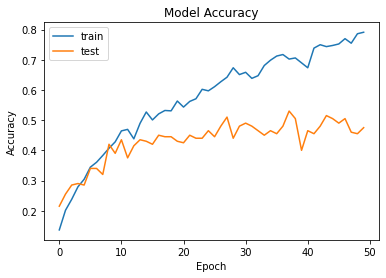

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h1>finaly we start measuring our Performance Metrics</h1>
<h3>1. Confusion matrix</h3>
<h3>2. Accuracy</h3>
<h3>3. Recall</h3>
<h3>4. Precision</h3>
<h3>5. F1 score</h3>

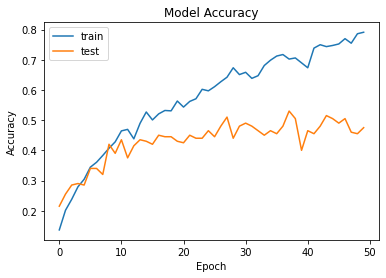

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [25]:

#we predict the y class based on the X_test and asign the valeus into y_pred
y_pred=model.predict(X_test) 
#this step is where the multi-classification and clasification approach differs 
y_pred=np.argmax(y_pred, axis=1)
y_test_1=np.argmax(y_test, axis=1)


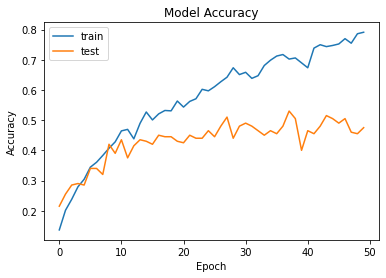

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [26]:
#we import the necessary libraries 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss



[[ 9  0  0  1  1  1  1  0  1  0]
 [ 0 10  0  0  0  1  0  0  0  0]
 [ 2  2  4  3  0  5  0  3  2  5]
 [ 3  0  0  7  4  1  1  2  4  2]
 [ 0  0  0  4 13  1  2  0  7  0]
 [ 0  2  0  0  0 11  0  0  2  1]
 [ 0  0  0  2  0  0 14  0  0  2]
 [ 0  2  1  2  2  1  0 12  2  1]
 [ 4  0  1  0  5  2  0  0  9  0]
 [ 3  0  5  2  1  0  2  0  1  6]]


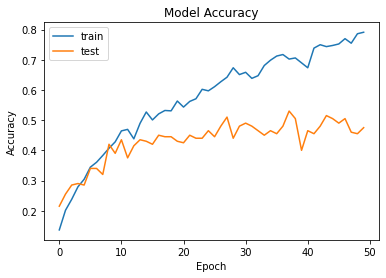

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [27]:
#1)
#we use confusion_matrix on (y_test_1 and y_pred) which are both (200,)
cm = confusion_matrix(y_test_1, y_pred)
print(cm)



[1.7334104776382446, 0.4749999940395355]

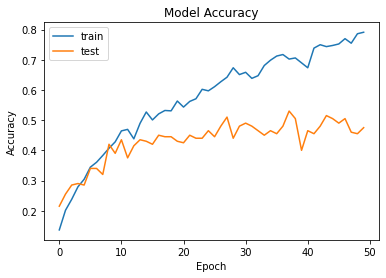

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [28]:
#2)
model.evaluate(X_test,y_test,verbose=0)
#output ['loss','accuracy']

Classification Report : 
              precision    recall  f1-score   support

           0       0.43      0.64      0.51        14
           1       0.62      0.91      0.74        11
           2       0.36      0.15      0.22        26
           3       0.33      0.29      0.31        24
           4       0.50      0.48      0.49        27
           5       0.48      0.69      0.56        16
           6       0.70      0.78      0.74        18
           7       0.71      0.52      0.60        23
           8       0.32      0.43      0.37        21
           9       0.35      0.30      0.32        20

    accuracy                           0.48       200
   macro avg       0.48      0.52      0.49       200
weighted avg       0.47      0.47      0.46       200



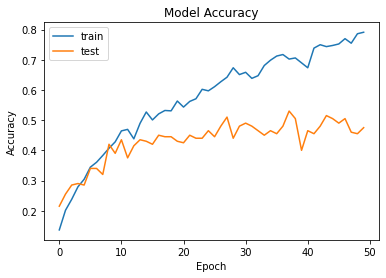

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [29]:
#3) ,4), 5)
#we use classification_report() that gives us the recll, precision and f1-score for each class
print ('Classification Report : ')
print (classification_report(y_test_1, y_pred))

AUC-ROC: 0.8622546898949628


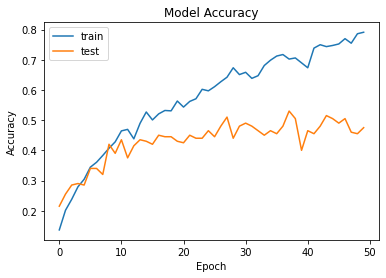

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [31]:
#clalculating the ROC metric  
pred = model.predict(X_test)
print('AUC-ROC:',roc_auc_score(y_test_1, pred, multi_class='ovr'))